# Branching ratios

A newly discovered particle was found to be able to decay in two different ways (two different decay channels): A and B. The probability $f_A$ for decay A to happen is called its _branching ratio_.

## Tasks


a) For a fixed number N of observed decays, explain why the number of decays to channel A should follow a binomial distribution.

b) Write down the conditional p.d.f. (aka posterior probability distribution) obtained via Bayes' theorem $P(f_A|\vec{k})$ where $\vec{k}$ are your observations. Explain the parameters and the different terms. What do you want to describe with $P(f_A|\vec{k})$?

c) Assuming a flat prior for the branching ratio $\pi(f_A)=1 \forall f_A\in[0,1]$ calculate and draw the posterior probability distribution for $f_A$ after measuring a single decay, which went to A.

d) Using the previous result as a prior, calculate and draw the new posterior after each of the observed additional decays "A", "B", "B", "A"

e) Calculate and draw the posterior after observing 100 decays, with 63 going to A.


### Hints

1. It is recommended to not start coding right away.
1. Realize what **one experiment** means in this task and how you then construct your Likelihood.

You can solve this problem by explicitly going through the single steps of the calculations. When representing the distributions with numpy arrays, 'np.sum()' comes in handy in the calculation of the normalization. Alternatively, you can also use the beta pdf which was discussed in the lecture and which is accessible through the scipy.stats package 'from scipy.stats import beta‘.


# Task a

The number of decays to channel A should follow a binomial distribution, as this represents a classic two-way experiment. 
The particle either decays to channel A or it does not.

# Task b

$$P(f_A|\vec{k}) = \frac{L(\vec{k}|f_A) \pi(f_A)}{\int L(\vec{k}|f_A) \pi(f_A) df_A}$$
The posterior probability distribution describes the probability of $f_A$, the parameter that we want to estimate, under the condition that we observed $\vec{k}$

$L(\vec{k}|f_A)$ describes the maximum likelyhood function as used in the previous task. 
$$L(\vec{k}|f_A)=\Pi_{i=1}^n f(\vec{k},f_{A_i})$$
The a priori probability distribution $\pi(f_A)$ describes the probability information, that is known before the experiment. E.g., it can contain information on how the particles (before the measurement) are distributed, based on their likelihood to decay into channel A or B (quantum mechanics tells us, that this information does not exist, but think of a covered urne with a known content of balls with either color a or color b.)
The denominator is used to normalize the posterior distribution.

# Task c

A flat prior for the branching ratio  $\pi(f_A)=1$ indicates the assumption, that particles who will decay into channel A and B respectively, are distributed equally. Hence, every particle has exactly the probability $f_A$ to decay into channel A and our posterior distribution can be simplified:
$$P(f_A|\vec{k}) = \frac{L(\vec{k}|f_A)}{\int L(\vec{k}|f_A)df_A}$$
Since we measured a single decay, which went to A, we can describe the likelyhood with a binominal probability density function, where $n=1$ and $k=1$
$$L(\vec{k}|f_A) = \binom{1}{1}{f_A} = f_A$$
Inserting this result into our posterior formula, we yield the following:
$$P(f_A|\vec{k}) = \frac{f_A}{\int_0^1 f_A df_A}=2 f_A$$

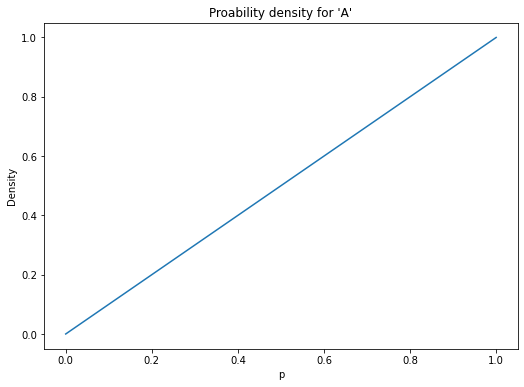

In [1]:
import matplotlib.pyplot as plt
from scipy.special import binom
from scipy.integrate import quad
import numpy as np

def bin(p,n,k):
    result = []
    for i in k:
        result.append(binom(n,i)*p**i*(1-p)**(n-i))
    return result

def beta(x,a,b):
    return x**(a-1)*(1-x)**(b-1)

def var_beta(a,b):
    return (a*b)/((a+b+1)*(a+b)**2)

def find_max(arr_x,arr_y):
    maxi = arr_y[0]
    max_x = 0
    for i in range(len(arr_x)):
        if(arr_y[i] > maxi):
            maxi = arr_y[i]
            max_x = arr_x[i]
    return max_x

x = np.linspace(0,1,100000)
y = beta(x,2,1)
plt.figure(figsize=(np.sqrt(2)*6,6))
plt.title("Proability density for 'A'")
plt.xlabel("p")
plt.ylabel("Density")
plt.plot(x,y)

# Task d (fixed)

From the result of task c, we assume a new a priori condition.
$$\pi(f_A) = 2 f_A$$
Hence, our posterior probability for the decay 'AA' yields:
$$P(f_A|\text{'AA'}) = \frac{2 \cdot {f_A}^2}{\int_0^1 2 \cdot {f_A}^2 df_A} = 3 {f_A}^2 $$
For the case of 'AAB' we take the result of 'AA' as priori information:
$$P(f_A|\text{'AAB'}) = \frac{3 \cdot {f_A}^2 \cdot (1-f_A)}{\int_0^1 3 \cdot {f_A}^2 \cdot (1-f_A) df_A} = 12 {f_A}^2 (1-f_A)  $$
Now for 'AABB' we take the result from 'AAB' as priori information:
$$P(f_A|\text{'AABB'}) = \frac{12 \cdot {f_A}^2 \cdot (1-f_A)^2}{\int_0^1 12 \cdot {f_A}^2 \cdot (1-f_A)^2 df_A} = 30 {f_A}^2 (1-f_A)^2  $$
Same procedure for 'AABBA':
$$P(f_A|\text{'AABBA'}) = \frac{30 \cdot {f_A}^3 \cdot (1-f_A)^2}{\int_0^1 30 \cdot {f_A}^3 \cdot (1-f_A)^2 df_A} = 60 {f_A}^3 (1-f_A)^2  $$

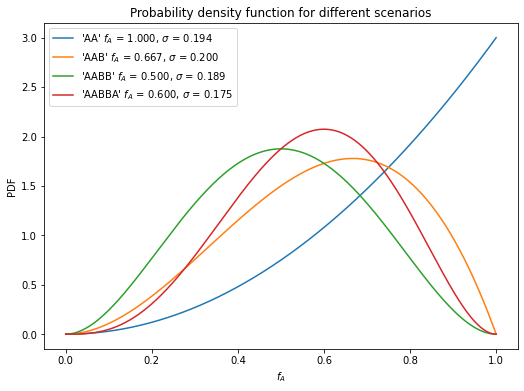

In [17]:
y_1 = 3*beta(x,3,1)
y_2 = 12*beta(x,3,2)
y_3 = 30*beta(x,3,3)
y_4 = 60*beta(x,4,3)
sigma_1 = np.sqrt(var_beta(3,1))
sigma_2 = np.sqrt(var_beta(3,2))
sigma_3 = np.sqrt(var_beta(3,3))
sigma_4 = np.sqrt(var_beta(4,3))

plt.figure(figsize=(np.sqrt(2)*6,6))
plt.title("Probability density function for different scenarios")
plt.xlabel(r"$f_A$")
plt.ylabel("PDF")
plt.plot(x,y_1,label=r"'AA' $f_A$ = {:.3f}, $\sigma$ = {:.3f}".format(find_max(x,y_1),sigma_1))
plt.plot(x,y_2,label=r"'AAB' $f_A$ = {:.3f}, $\sigma$ = {:.3f}".format(find_max(x,y_2),sigma_2))
plt.plot(x,y_3,label=r"'AABB' $f_A$ = {:.3f}, $\sigma$ = {:.3f}".format(find_max(x,y_3),sigma_3))
plt.plot(x,y_4,label=r"'AABBA' $f_A$ = {:.3f}, $\sigma$ = {:.3f}".format(find_max(x,y_4),sigma_4))
plt.legend()

# Task d (old and wrong)

From the result of task c, we assume a new a priori condition. We can drop the factor 2, as we will normalize later anyway.
$$\pi(f_A) = f_A$$
Hence, our posterior probability yields:
$$P(f_A|\vec{k}) = \frac{\binom{n}{k}{f_A}^{k+1} \cdot (1-f_A)^{n-k}}{\int_0^1 \binom{n}{k}{f_A}^{k+1} \cdot (1-f_A)^{n-k} df_A}$$
For the first additional decay to A, we have n=2 and k=2, resulting in:
$$P(f_A|\vec{k}) = \frac{{f_A}^{3}}{\int_0^1{f_A}^{3} df_A}= 4 {f_A}^3$$
For "AAB" we have n=3 and k=2:
$$P(f_A|\vec{k}) = \frac{\binom{3}{2}{f_A}^{3} \cdot (1-f_A)^{3-2}}{\int_0^1 \binom{3}{2}{f_A}^{3} \cdot (1-f_A)^{3-2} df_A}=\frac{{f_A}^{3} \cdot (1-f_A)}{\int_0^1 {f_A}^{3} \cdot (1-f_A) df_A}= 20{f_A}^{3} \cdot (1-f_A)$$
For "AABB" we have n=4 and k=2:
$$P(f_A|\vec{k}) = \frac{\binom{4}{2}{f_A}^{3} \cdot (1-f_A)^{2}}{\int_0^1 \binom{4}{2}{f_A}^{3} \cdot (1-f_A)^{2} df_A}=\frac{{f_A}^{3} \cdot (1-f_A)^2}{\int_0^1 {f_A}^{3} \cdot (1-f_A)^2 df_A}= 60{f_A}^{3} \cdot (1-f_A)^2$$
For "AABBA" we have n=5 and k=3:
$$P(f_A|\vec{k}) = \frac{\binom{5}{3}{f_A}^{4} \cdot (1-f_A)^{2}}{\int_0^1 \binom{5}{3}{f_A}^{4} \cdot (1-f_A)^{2} df_A}=\frac{{f_A}^{4} \cdot (1-f_A)^2}{\int_0^1 {f_A}^{4} \cdot (1-f_A)^2 df_A}=105{f_A}^{4} \cdot (1-f_A)^2$$

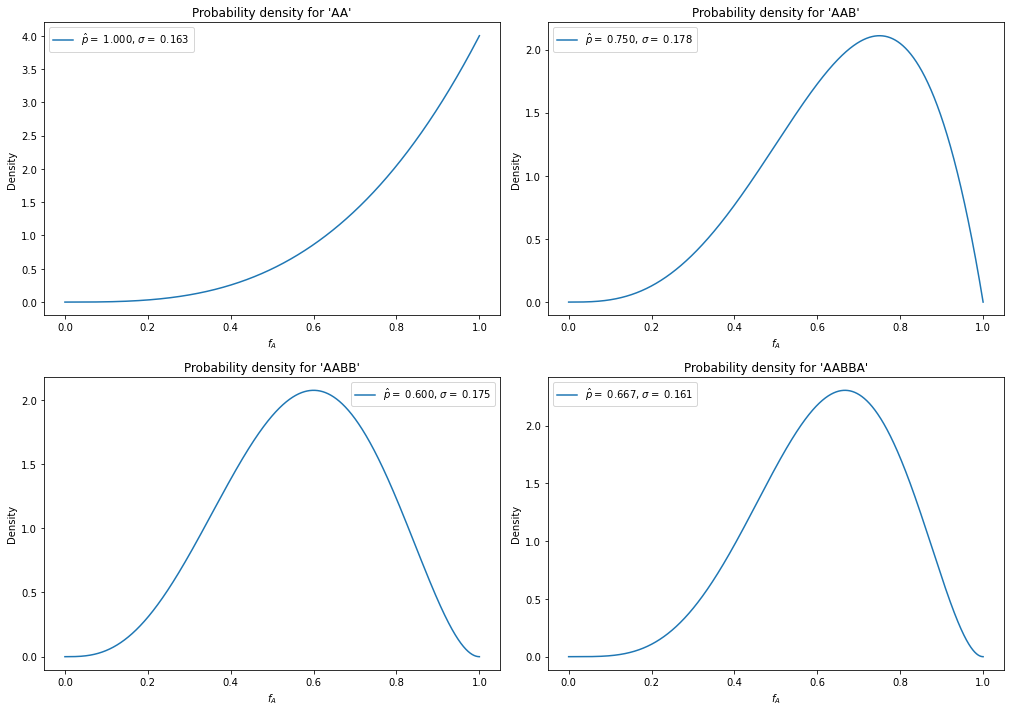

In [3]:
y_1 = beta(x,4,1) #AA
y_2 = beta(x,4,2) #AAB
y_3 = beta(x,4,3) #AABB
y_4 = beta(x,5,3) #AABB

sigma_1 = np.sqrt(var_beta(4,1))
sigma_2 = np.sqrt(var_beta(4,2))
sigma_3 = np.sqrt(var_beta(4,3))
sigma_4 = np.sqrt(var_beta(5,3))

I_1 = quad(beta,0,1,args=(4,1))[0]
I_2 = quad(beta,0,1,args=(4,2))[0]
I_3 = quad(beta,0,1,args=(4,3))[0]
I_4 = quad(beta,0,1,args=(5,3))[0]

fig, ax = plt.subplots(2,2,figsize=(np.sqrt(2)*10,10))
ax[0,0].set_xlabel(r"$f_A$")
ax[0,1].set_xlabel(r"$f_A$")
ax[1,0].set_xlabel(r"$f_A$")
ax[1,1].set_xlabel(r"$f_A$")

ax[0,0].set_ylabel("Density")
ax[0,1].set_ylabel("Density")
ax[1,0].set_ylabel("Density")
ax[1,1].set_ylabel("Density")

ax[0,0].set_title("Probability density for 'AA'")
ax[0,1].set_title("Probability density for 'AAB'")
ax[1,0].set_title("Probability density for 'AABB'")
ax[1,1].set_title("Probability density for 'AABBA'")

ax[0,0].plot(x,y_1/I_1,label=r"$\hat{} = $ {:.3f}, $\sigma = $ {:.3f}".format("{p}",find_max(x,y_1),sigma_1))
ax[0,1].plot(x,y_2/I_2,label=r"$\hat{} = $ {:.3f}, $\sigma = $ {:.3f}".format("{p}",find_max(x,y_2),sigma_2))
ax[1,0].plot(x,y_3/I_3,label=r"$\hat{} = $ {:.3f}, $\sigma = $ {:.3f}".format("{p}",find_max(x,y_3),sigma_3))
ax[1,1].plot(x,y_4/I_4,label=r"$\hat{} = $ {:.3f}, $\sigma = $ {:.3f}".format("{p}",find_max(x,y_4),sigma_4))

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
fig.tight_layout()

# Task e

After observing 100 decays, of which 63 went to A, we have n=100 and k = 63:
$$P(f_A|\vec{k}) = \frac{\binom{100}{63}{f_A}^{63+1} \cdot (1-f_A)^{100-63}}{\int_0^1 \binom{100}{63}{f_A}^{63+1} \cdot (1-f_A)^{100-63} df_A}=\frac{{f_A}^{64} \cdot (1-f_A)^{37}}{\int_0^1 {f_A}^{64} \cdot (1-f_A)^{37} df_A}=1.817 \times 10^{30} {f_A}^{64} \cdot (1-f_A)^{37}$$

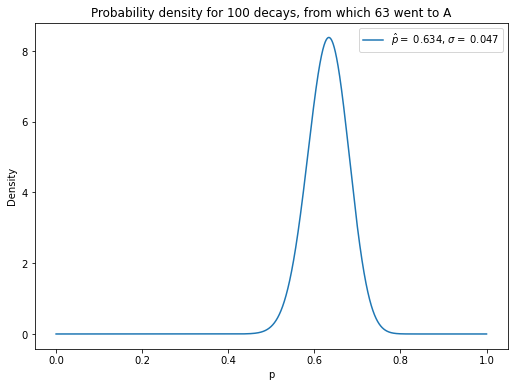

In [4]:
y_e = beta(x,65,38)
sigma_e = np.sqrt(var_beta(65,38))
I_e = quad(beta,0,1,args=(65,38))[0]
plt.figure(figsize=(np.sqrt(2)*6,6))
plt.title("Probability density for 100 decays, from which 63 went to A")
plt.xlabel("p")
plt.ylabel("Density")
plt.plot(x,y_e/I_e,label=r"$\hat{} = $ {:.3f}, $\sigma = $ {:.3f}".format("{p}",find_max(x,y_e),sigma_e))
plt.legend()